# Previsão da necessidade de cuidados intensivos

# Resumo

# Contexto do problema

# Escopo

# Importação dos pacotes

In [2]:
import pandas as pd
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectFromModel, SelectKBest, RFECV
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
import os
import logging, sys

In [3]:
warnings.filterwarnings('ignore')
logging.disable(sys.maxsize)
SEED = 64541

# Importações das funções locais

In [6]:
os.chdir("../funcoes")
from my_classifier import Classifier
os.chdir("../notebooks")

# Leitura dos dados pré-processados

In [7]:
df = pd.read_csv('../dados/dados_preprocessados/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

In [8]:
sns.set_style('darkgrid')

In [9]:
df.head()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,...,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU,AGE_UNDER_30th,AGE_UNDER_50th,AGE_ABOVE_80th
0,1,0,0,0,0,1,1,0,0,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1,1,1,0
2,0,0,0,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0,1,1,0


# Validação Cruzada

A validação cruzada é um método estatístico usado para estimar a habilidade dos modelos de aprendizado de máquina, portanto a fim de tentar resumir a performance de um modelo de Machine Learning e, escolher o melhor modelo para o problema em questão. Essa técnica consiste em realizar divisões dentro do dataset inteiro entre dados de treino e teste de forma const 

![CV](../img/dataml_cross_validation.png)

### RepeatedStratifiedKFold

porém realizando divisões no dataset de forma que as proporções da variável dependente se mantivessem as mais próximas possíveis em toda a divisão, e além disso realizando essa validação cruzada diversas vezes para que, com isso, consiga resumir a performance de um modelo da maneira mais realista possível.

# Métricas

# Primeiros modelos

In [12]:
lr = Classifier(LogisticRegression, df, max_iter=1000)
lr.cross_val()

Exception ignored in: <function tqdm.__del__ at 0x0000019249818670>
Traceback (most recent call last):
  File "C:\Users\pedro\anaconda3_02\envs\bootcampfinal\lib\site-packages\tqdm\std.py", line 1152, in __del__
    self.close()
  File "C:\Users\pedro\anaconda3_02\envs\bootcampfinal\lib\site-packages\tqdm\notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [11]:
dt = Classifier(DecisionTreeClassifier, df)
dt.cross_val()

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [9]:
rf = Classifier(RandomForestClassifier, df)
rf.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média assumindo uma população seguindo uma distribuição normal
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.758 ± 0.015     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA       : 0.711 ± 0.014 
PRECISÃO  MÉDIA       : 0.692 ± 0.019 
RECALL MÉDIO          : 0.652 ± 0.014 
F1-SCORE  MÉDIO       : 0.657 ± 0.016

TEMPO MÉDIO DE TREINAMENTO:0.184


In [10]:
et = Classifier(ExtraTreesClassifier, df)
et.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : ExtraTreesClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média assumindo uma população seguindo uma distribuição normal
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.728 ± 0.017     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA       : 0.673 ± 0.014 
PRECISÃO  MÉDIA       : 0.644 ± 0.020 
RECALL MÉDIO          : 0.607 ± 0.014 
F1-SCORE  MÉDIO       : 0.607 ± 0.015

TEMPO MÉDIO DE TREINAMENTO:0.142


In [11]:
xg = Classifier(XGBClassifier, df, verbosity=0)
xg.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média assumindo uma população seguindo uma distribuição normal
--------------------------

In [ ]:
lgbm = Classifier(LGBMClassifier, df, verbosity=-1)
lgbm.cross_val()

In [ ]:
ax = lr.plot_roc_curve()
dt.plot_roc_curve(ax=ax)
rf.plot_roc_curve(ax=ax)
xg.plot_roc_curve(ax=ax, name_estimator='XGBoost()')
lgbm.plot_roc_curve(ax=ax)
et.plot_roc_curve(ax=ax)
plt.show()

# Reamostragem

In [ ]:
df['ICU'].value_counts()

In [ ]:
icu0 = df.query('ICU == 0')
icu1 = df.query('ICU == 1')

In [ ]:
icu1_resample = resample(icu1,
                         n_samples=len(icu0),
                         random_state=SEED)

In [ ]:
df_resample = pd.concat([icu1_resample, icu0], axis=0)
df_resample['ICU'].value_counts()

In [ ]:
lr = Classifier(LogisticRegression, df_resample, max_iter=1000)
lr.cross_val()

In [ ]:
rf = Classifier(RandomForestClassifier, df_resample)
rf.cross_val()

In [ ]:
et = Classifier(ExtraTreesClassifier, df_resample)
et.cross_val()

In [ ]:
xg = Classifier(XGBClassifier, df_resample, verbosity=0)
xg.cross_val()

In [ ]:
lgbm = Classifier(LGBMClassifier, df_resample, verbosity=-1)
lgbm.cross_val()

In [ ]:
ax = lr.plot_roc_curve()
dt.plot_roc_curve(ax=ax)
rf.plot_roc_curve(ax=ax)
xg.plot_roc_curve(ax=ax, name_estimator='XGBoost()')
lgbm.plot_roc_curve(ax=ax)
et.plot_roc_curve(ax=ax)
plt.show()

### Otimização dos hiperparâmetros

In [144]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
X = df_resample.drop('ICU', axis=1)
y = df_resample['ICU']

In [110]:
params_xgboost = {
        'n_estimators': [50, 100, 150],
        'min_child_weight': [2, 3, 4, 5, 6],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 6],
        'num_leaves': [10, 25, 50, 100],
        'learning_rate' : [0.1,0.05]
        }
gsxg = GridSearchCV(XGBClassifier(), params_xgboost,cv=cv, scoring='roc_auc')
gsxg.fit(X,y)
gsxg.best_score_

KeyboardInterrupt: 

In [145]:
params_rf = {
            'bootstrap': [True, False],
            'n_estimators': [50, 100, 150],
            'max_depth': [2, 3, 4, 5, 6],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }
gsrf = GridSearchCV(RandomForestClassifier(), params_rf,cv=cv, scoring='roc_auc')
gsrf.fit(X,y)
gsrf.best_score_

KeyboardInterrupt: 

In [112]:
params_lg = {
            'boosting_type':['dart', 'goss', 'gbdt'],
            'min_gain_to_split': [0.05, 0],
            'feature_fraction ': [0.8, 0.6, 1],
            'early_stopping_rounds':[1,2,None],
            'feature_pre_filter':[True, False],
            'n_estimators': [50, 100, 150],
            'max_depth': [2, 3, 4, 5, 6],
            'num_leaves': [10, 25, 50],
            'learning_rate' : [0.1, 0.05]
}
gslg = GridSearchCV(LGBMClassifier(), params_lg,cv=cv, scoring='roc_auc')
gslg.fit(X,y)
gslg.best_score_

[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] feature_fraction is set=, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] early_stopping_round is set=1, early_stopping_rounds=1 will be ignored. Current value: early_stopping_round=1
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] feature_fraction is set=, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] early_stopping_round is set=1, early_stopping_rounds=1 will be ignored. Current value: early_stopping_round=1
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] feature_fraction is set=, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=


KeyboardInterrupt: 

In [111]:
gslg.best_params_

{'boosting_type': 'dart',
 'early_stopping_rounds': 2,
 'feature_fraction ': 0.75,
 'feature_pre_filter': True,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_gain_to_split': 0.05,
 'n_estimators': 150,
 'num_leaves': 25}

# Seleção de variáveis

## LogisticRegression

# Validação dos resultados

A fim de se obter a maior certeza nesses resultados e, testar se essa validação cruzada com 10 divisões e 5 repetições é a ideal vou testar a hipótese nula que as métricas obtidas seguem uma distribuição normal, e com isso, podemos definir, de forma confirmatória, o intervalo de confiança para média de cada métrica igual a:

## $$\mu = \bar{x} \pm \frac{\sigma}{\sqrt{n}}$$

#### Onde $\mu$ é a média populacional, $\bar{x}$ é a média da amostra das métricas calculadas, $\sigma$ é o desvio padrão amostral calculado e n é o tamanho da amostra, que no nosso caso é 50, 5 repetiçoes e 10 divisões do dataset $5\:X\:10 = 50$

Primeiramente vou observar essas métricas por meio de um histograma a fim de entender suas distribuições.

### LogisticRegression

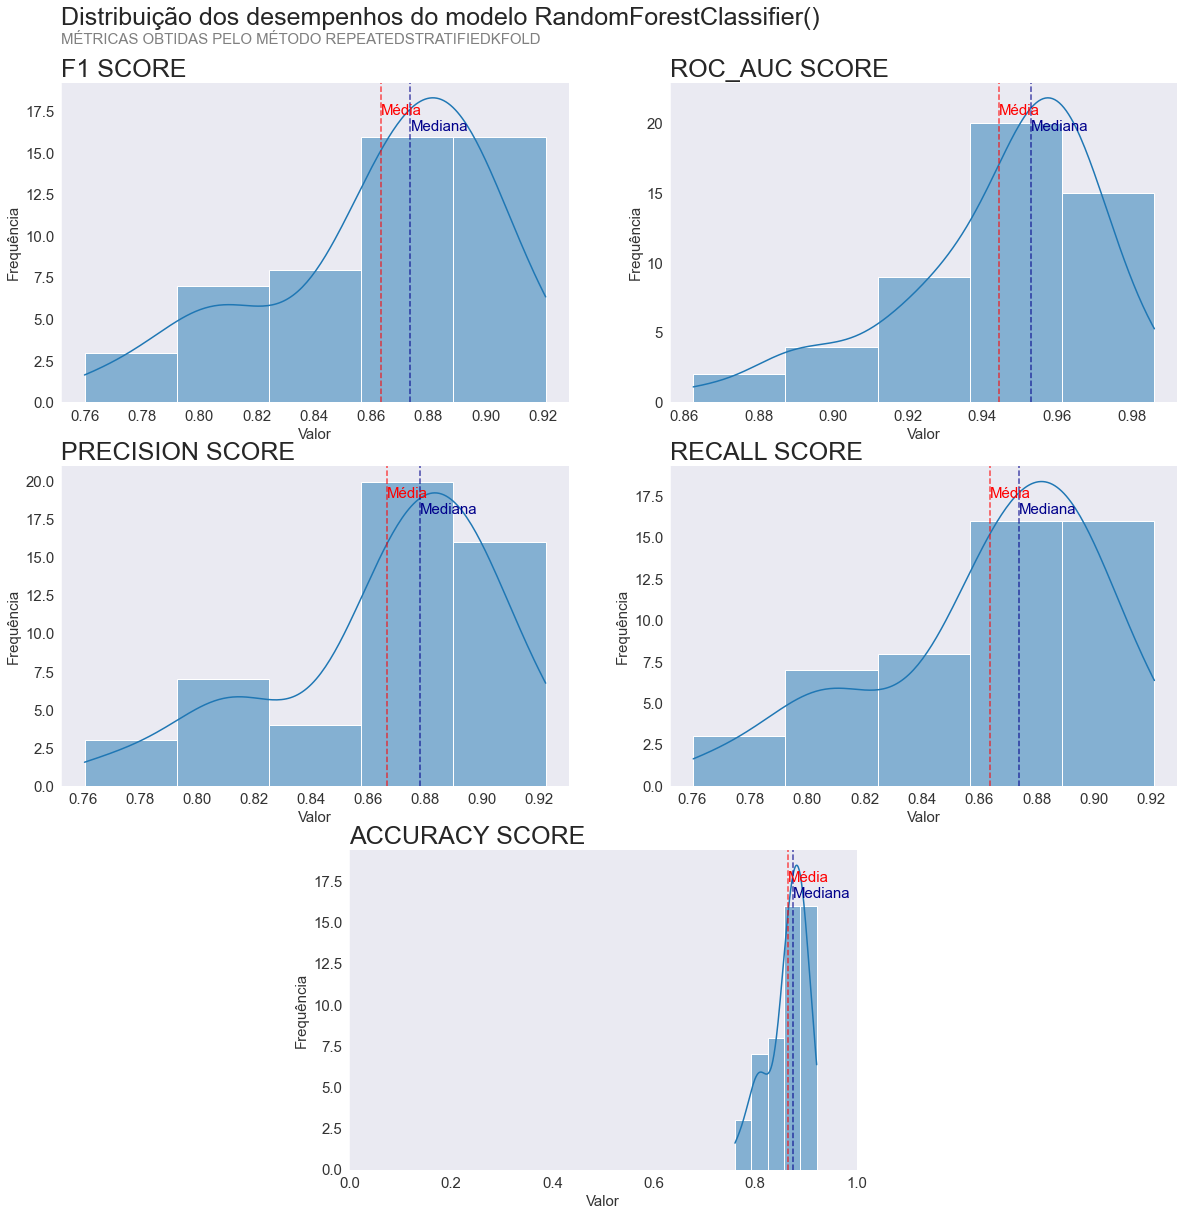

In [151]:
rf.hist_metrics(kde=True, bins=5, show=False)
plt.show()